<div class="alert alert-success">
<br><br>
<center><br><font size="10"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Deteksi serangan Remote to Local(R2L) dengan menggunakan data NSL-KDD
<br>
<br><strong>Agung Setiawan
<br><strong>09011281722039
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

### Modul Yang Diperlukan

 <div class="alert alert-warning">
<div>


Modul Yang diperlukan adalah
1. `numpy dan Pandas ` berguna untuk menghandle data.

2. `Matplotlib` untuk men-plot hasil akurasi dan loss.

3. `sklearn` Memiliki beberapa fungsi yaitu :

a. train_test_split  => Untuk men-split data menjadi training dan testing

b. confusion_matrix  => mengukur performa model learning dalam bentuk tabel

c. classification_report => mendapatkan hasil pengukuran CM

d. PCA(Principal Component Analysis) => mereduksi fitur

4. `keras` Memiliki beberapa fungsi yaitu :
    - Optimizers Adam
    - Model Sequential
    - Layers Dense
    - Aktivasi Relu
    - utils to_categorical

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


 <div class="alert alert-warning">
<div>

### Dataset
Data set yang dipakai adalah NSL-KDD. Data ini bisa didapat di kaggle
Link Dataset nya : 
    
https://www.kaggle.com/hassan06/nslkdd
    
<h3>NSL-KDD dataset</h3>
<ul>
    <li><strong> Jumlah data</strong> : 494021</li>
</ul>

 <div class="alert alert-warning">
<div>


### Import Data Set

Dataset diubah menjadi.

    1.kddcup_99_agung.csv : Deteksi serangan Remote to Local(R2L)

Setelah data diatas diload, selanjutnya kita drop kolom yang tidak terpakai yaitu "Unnamed: 0"

In [2]:
data = pd.read_csv ("kddcup_99_agung.csv")
data1 = data.drop(columns=["Unnamed: 0"])

Mengecek head dari data yang kita pakai

In [3]:
data1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_cat
0,0,tcp,http,SF,160,13460,0,0,0,0,...,1.00,0.00,0.09,0.06,0.0,0.0,0.00,0.0,normal,0
1,31,tcp,imap4,SF,1345,10036,0,0,0,0,...,0.00,0.01,0.00,0.00,0.0,0.0,0.03,0.0,imap,1
2,0,tcp,http,SF,239,359,0,0,0,0,...,1.00,0.00,0.25,0.07,0.0,0.0,0.00,0.0,normal,0
3,2,tcp,ftp,SF,1250,2451,0,0,0,28,...,0.53,0.02,0.01,0.00,0.0,0.0,0.00,0.0,warezclient,1
4,1,tcp,ftp,SF,1237,2451,0,0,0,28,...,0.25,0.02,0.00,0.00,0.0,0.0,0.01,0.0,warezclient,1


In [4]:
enc = LabelEncoder()
dataset = data1.apply(enc.fit_transform)
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_cat
0,0,1,7,7,46,1072,0,0,0,0,...,99,0,9,6,0,0,0,0,4,0
1,20,1,8,7,422,1024,0,0,0,0,...,0,1,0,0,0,0,2,0,2,1
2,0,1,7,7,122,101,0,0,0,0,...,99,0,21,7,0,0,0,0,4,0
3,2,1,5,7,392,651,0,0,0,15,...,53,2,1,0,0,0,0,0,7,1
4,1,1,5,7,380,651,0,0,0,15,...,25,2,0,0,0,0,1,0,7,1


 <div class="alert alert-warning">
<div>

### Pemisahan antara Fitur dan Label pada dataset

Fitur dan Label dipisah supaya mesin bisa mempelajari fitur dari label yang diberikan.
   Fitur:
   
   X = 42 Node/detik
    
   Label:
   
   Y = 1 kolom isinya 2 kelas ( Normal atau R2L)

In [5]:
x= np.array(dataset.ix[:, 0:42])
y = np.array(dataset.ix[:, 42])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [6]:
dataset.shape

(3126, 43)

In [7]:
dataset.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_cat
count,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.0,3126.0,3126.000000,3126.000000,...,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000
mean,2.388996,1.007038,6.752399,6.889315,185.878439,408.536148,0.0,0.0,0.000960,1.525592,...,88.488804,1.127959,15.390275,4.761036,0.646833,0.345809,0.530390,0.325656,4.936020,0.360205
std,11.110859,0.126295,1.611792,0.800341,109.034644,372.681501,0.0,0.0,0.039988,4.359796,...,25.308877,3.922808,20.575308,7.168520,3.222923,2.057352,3.250729,2.417171,1.542279,0.480136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,7.000000,105.000000,8.000000,0.0,0.0,0.000000,0.000000,...,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,0.000000,1.000000,7.000000,7.000000,182.000000,357.500000,0.0,0.0,0.000000,0.000000,...,99.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,0.000000,1.000000,7.000000,7.000000,216.000000,653.000000,0.0,0.0,0.000000,0.000000,...,99.000000,0.000000,32.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,93.000000,2.000000,13.000000,8.000000,481.000000,1202.000000,0.0,0.0,2.000000,16.000000,...,99.000000,34.000000,50.000000,44.000000,34.000000,28.000000,28.000000,22.000000,8.000000,1.000000


 <div class="alert alert-warning">
<div>

### Preprocessing dataset.

Dataset yang diambil dengan cara :
    
   1. Scaling => mengubah nilai data menjadi 0 sampai 1
   2. Memotong sinyal sebanyak 42 node/beat. 

In [8]:
normal = dataset[dataset.attack_cat==0]
R2L = dataset[dataset.attack_cat==1]

### Splitting Data

Text(0, 0.5, 'Frequency')

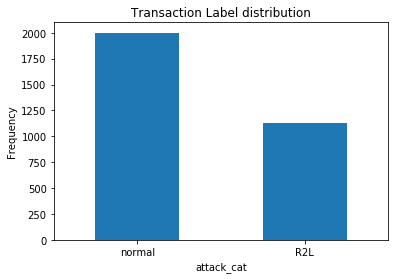

In [9]:
labels = ['normal','R2L']
classes = pd.value_counts(data['attack_cat'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(2), labels)
plt.xlabel("attack_cat")
plt.ylabel("Frequency")

### Reduksi Fitur

In [10]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(x)
feature_scaled.shape

(3126, 42)

In [11]:
print(y)

[0 1 0 ... 0 0 0]


In [12]:
from sklearn.model_selection import train_test_split

 Data fitur dan label dibagi menjadi data train dan test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

 <div class="alert alert-warning">
<div>

### Model ANN

Disini digunakan model Sequential(). Pada Model ini terdapat Input layer , Hidden layer dan Output layer. 

<strong>Penentuan Jumlah Layer ditentukan sebagai berikut </strong>:

   1. Jumlah dari input layer itu sama dengan jumlah fitur yang diberikan kepada mesin.
   2. Jumlah dari Hidden layer ditentukan sesuai dengan atau lebih besar dari Input layer.
   3. Jumlah dari Output Layer sesuai dengan kolom yang diberikan kepada mesin.
  
  
<strong>Jumlah layer yang ditentukan adalah </strong>:

   1. Input layer : Layer pertama terbentuk dari 42 layer Neural sesuai fitur dengan menggunakan activation                                    relu.
   2. Hidden Layer pertama : 42 units Neural Network dengan menggunakan activation relu.
   3. Hidden Layer Kedua : 42 units Neural Network dengan menggunakan activation relu.
   4. Output layer : 1 unit Neural Network dengan menggunakan activation sigmoid.

In [14]:
model = Sequential()
model.add(Dense(units= 20, input_dim =42 , activation='relu'))
model.add(Dense(units= 10, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

 <div class="alert alert-warning">
<div>

### Compile Model

Melakukan compile dengan Optimizer adam dengan fungsi loss Binary Crossentropy. Disini ada parameter optimizer adam  yaitu learning_rate.

Learning_rate yaitu seberapa teliti mesin itu belajar. Semakin kecil nilai learning rate ,maka semakin teliti mesin belajar dan semakin tinggi kesempatan untuk mendapatkan hasil yang bagus. Learning rate yang tinggi memiliki kelemahan yaitu, waktu untuk proses training yang lama.

In [15]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

 <div class="alert alert-warning">
<div>

### Melakukan Training model dengan data train serta Validasi dengan data Test

Model yang sudah dibentuk sesuai dengan **data train** dan menvalidasi proses dengan data validasi yaitu **data testing**. 

Ada juga parameter yaitu :

1. `batch_size` : Merupakan seberapa banyak sample yang dimasukkan ke dalam Model dalam satu iterasi
2. `epochs`  : Merupakan seberapa banyak mesin mengulang pembelajaran sampai nilai weight tidak berubah lagi.

In [16]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=100)

Train on 2500 samples, validate on 626 samples
Epoch 1/100
2500/2500 [==============================] - 0s 78us/step - loss: 2.3903 - accuracy: 0.8888 - val_loss: 0.1018 - val_accuracy: 0.9792
Epoch 2/100
2500/2500 [==============================] - 0s 39us/step - loss: 0.1103 - accuracy: 0.9744 - val_loss: 0.0532 - val_accuracy: 0.9872
Epoch 3/100
2500/2500 [==============================] - 0s 35us/step - loss: 0.0893 - accuracy: 0.9772 - val_loss: 0.0413 - val_accuracy: 0.9888
Epoch 4/100
2500/2500 [==============================] - 0s 34us/step - loss: 0.0710 - accuracy: 0.9820 - val_loss: 0.0367 - val_accuracy: 0.9872
Epoch 5/100
2500/2500 [==============================] - 0s 33us/step - loss: 0.0484 - accuracy: 0.9868 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 6/100
2500/2500 [==============================] - 0s 32us/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0720 - val_accuracy: 0.9792
Epoch 7/100
2500/2500 [==============================] - 0s 31us/step - loss:

2500/2500 [==============================] - 0s 30us/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0469 - val_accuracy: 0.9952
Epoch 57/100
2500/2500 [==============================] - 0s 30us/step - loss: 8.8597e-04 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9952
Epoch 58/100
2500/2500 [==============================] - 0s 30us/step - loss: 0.0015 - accuracy: 0.9988 - val_loss: 0.0524 - val_accuracy: 0.9952
Epoch 59/100
2500/2500 [==============================] - 0s 29us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9920
Epoch 60/100
2500/2500 [==============================] - 0s 29us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0532 - val_accuracy: 0.9936
Epoch 61/100
2500/2500 [==============================] - 0s 29us/step - loss: 8.0344e-04 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9952
Epoch 62/100
2500/2500 [==============================] - 0s 29us/step - loss: 6.7704e-04 - accuracy: 1.0000 - val_loss: 0.

### Melakukan Perhitungan Akurasi

In [17]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

626/626 [==============================] - 0s 14us/step


[0.0486619855493007, 0.995207667350769]

 <div class="alert alert-warning">
<div>

### Evaluasi Model Plot 

1. `Overfitting` 

Overfitting terjadi apabila hasil akurasi dari data testing itu **lebih rendah** daripada data training.

2. `Underfitting`

Underfitting terjadi apabila hasil akurasi dari data testing itu **lebih tinggi** daripada data training.

3. `Fit`

Fit apabila hasil akurasi dari data testing **tidak berbeda jauh** daripada data training.

### Melakukan Plot hasil akurasi training dan akurasi testing

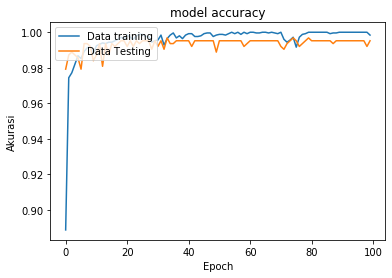

In [18]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

### Melakukan Plot hasil Loss antara training dan testing

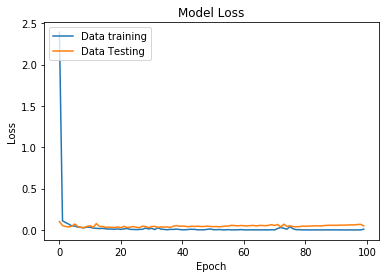

In [19]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

 <div class="alert alert-warning">
<div>

### Confusion Matrix

Confusion Matrix adalah sebuah tabel yang berisi 2 jenis nilai yaitu Nilai prediksi dan Nilai Dataset(nilai yang benar). Nilai tersebut dipecah menjadi 4 dan akan dibandingkan untuk mendapatkan informasi tentang performa model learning.
    
Jika 0 ( positive ) dan 1 ( negative ).

1. True Positive : Mesin memprediksi positive dan benar
2. True Negative : Mesin memprediksi negative dan benar
3. False Positive : Mesin memprediksi Positive dan padahal negative 
4. False Negative : Mesin memprediksi negative dan padahal positive


In [20]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [21]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[387   1]
 [  2 236]]


 <div class="alert alert-warning">
<div>

### Melakukan Evaluasi Model dengan Confusion Matrix

Pada Confusion matrik ada banyak penilaian yang bisa diambil untuk mengukur performa dari model learning. Namun yang sering dipakai adalah :

1. Akurasi : Melakukan perbandingan Seberapa banyak model mengklasifikasi kelas yang benar dengan total kelas yang ada.

Akurasi = (TP+TN)/(TP+TN+FP+FN)

2. Recall : Melihat seberapa akurat mesin untuk mengklasifikasi kelas yang positif.

Recall = TP/(TP+FN)

3. Presisi : Melakukan perbandingan prediksi kelas yang positif yang benar dengan semua prediksi kelas positif.

Presisi = TP/(TP+FP)
        
4. F1 : Merupakan nilai rata-rata dari Recall dan Presisi 
        
F1 = (2*Presisi*recall) / (presisi+recall)

In [22]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [23]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)


Confussion matriks:
 [[387   1]
 [  2 236]]


In [24]:
print("akurasi : ",akurasi)
print("sensitivity : ",Sensitivity )
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)

akurasi :  0.9952076677316294
sensitivity :  0.9948586118251928
precesion :  0.9974226804123711
recall :  0.9948586118251928
F1 :  0.9961389961389961


 <div class="alert alert-warning">
<div>

### Referensi

`Dataset` : https://www.kaggle.com/hassan06/nslkdd

`Paper` : Sayantan Guha, Stephen S. Yau, and Arun Balaji Buduru. "Attack Detection in Cloud Infrastructures Using Artificial Neural Network with Genetic Feature Selection." 
https://ieeexplore.ieee.org/abstract/document/7588878